<a href="https://colab.research.google.com/github/VanajaT/DDoS-Attack-SDN/blob/main/SDN(DDOS)_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional,GRU
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam

UPLOADING THE DATASET

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
features= ['dt','switch','pktcount','bytecount','dur','dur_nsec',	'tot_dur','flows','packetins','pktperflow','byteperflow','pktrate','Pairflow','Protocol','port_no','tx_bytes','rx_bytes']
df.Protocol[df.Protocol == 'UDP'] = 1
df.Protocol[df.Protocol == 'TCP'] = 2
df.Protocol[df.Protocol == 'ICMP'] = 3
print(df)
x = df[features]
y = df.label

           dt  switch        src       dst  ...  port_no   tx_bytes  rx_bytes  label
0       11425       1   10.0.0.1  10.0.0.8  ...        3  143928631      3917      0
1       11605       1   10.0.0.1  10.0.0.8  ...        4       3842      3520      0
2       11425       1   10.0.0.2  10.0.0.8  ...        1       3795      1242      0
3       11425       1   10.0.0.2  10.0.0.8  ...        2       3688      1492      0
4       11425       1   10.0.0.2  10.0.0.8  ...        3       3413      3665      0
...       ...     ...        ...       ...  ...      ...        ...       ...    ...
104340   5262       3   10.0.0.5  10.0.0.7  ...        1      15209     12720      0
104341   5262       3   10.0.0.5  10.0.0.7  ...        3      15099     14693      0
104342   5262       3  10.0.0.11  10.0.0.5  ...        2       3409      3731      0
104343   5262       3  10.0.0.11  10.0.0.5  ...        1      15209     12720      0
104344   5262       3  10.0.0.11  10.0.0.5  ...        3      150

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

DATA PREPROCESSING

In [ ]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(x)
x= scalar.transform(x)

In [ ]:
features = len(x[0])
samples = x.shape[0]
train_len = 17
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = x[j]
    I[i] = temp

In [ ]:
x.shape

(104345, 17)

TRAIN AND TEST SPLIT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(I, y[17:104345], test_size = 0.3)

In [ ]:
x_train.shape

(73029, 17, 17)

In [ ]:
x_test.shape

(31299, 17, 17)

LSTM

BIULD THE MODEL

In [ ]:
model = Sequential()

model.add(LSTM(64, activation='tanh'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])




TRAINING THE MODEL

In [ ]:
history = model.fit(x_train, y_train, epochs = 50,batch_size=58)

TEST THE MODEL

In [ ]:
history = model.fit(x_test, y_test, epochs = 50,batch_size=58)

Epoch 1/50
540/540 [==============================] - 7s 13ms/step - loss: 0.3443 - accuracy: 0.8858
Epoch 2/50
540/540 [==============================] - 7s 13ms/step - loss: 0.2078 - accuracy: 0.9172
Epoch 3/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1763 - accuracy: 0.9296
Epoch 4/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1559 - accuracy: 0.9378
Epoch 5/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1399 - accuracy: 0.9444
Epoch 6/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1285 - accuracy: 0.9477
Epoch 7/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1175 - accuracy: 0.9535
Epoch 8/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1063 - accuracy: 0.9583
Epoch 9/50
540/540 [==============================] - 7s 13ms/step - loss: 0.1019 - accuracy: 0.9593
Epoch 10/50
540/540 [==============================] - 7s 13ms/step - loss: 0.0940 - accura

EVALUATING THE MODEL

In [ ]:
print('Accuracy on test set: {}'.format(model.evaluate(x_test, y_test)[1]))

979/979 [==============================] - 4s 3ms/step - loss: 0.0314 - accuracy: 0.9927
Accuracy on test set: 0.9927473664283752


In [ ]:
# PREDICTING THE TEST SET
y_pred=model.predict(x_test)
y_pred =(y_pred>0.5)
print(y_pred)

[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]


In [ ]:
#Evaluation of Model - Confusion Matrix Plot
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')




#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
#Precision
Precision = tp/(tp+fp)
print("Precision {:0.3f}".format(Precision))


Precision 0.992


In [ ]:
#Recall
Recall = tp/(tp+fn)
print("Recall {:0.3f}".format(Recall))


Recall 0.989


In [ ]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))


F1 Score 0.991


In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(64, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(32, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(16, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

model.compile(loss = 'binary_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs = 50,batch_size=100)

Epoch 1/50
731/731 [==============================] - 23s 25ms/step - loss: 1.4007 - accuracy: 0.7703
Epoch 2/50
731/731 [==============================] - 19s 26ms/step - loss: 0.4775 - accuracy: 0.8460
Epoch 3/50
731/731 [==============================] - 19s 25ms/step - loss: 0.4549 - accuracy: 0.8519
Epoch 4/50
731/731 [==============================] - 19s 26ms/step - loss: 0.4407 - accuracy: 0.8556
Epoch 5/50
731/731 [==============================] - 18s 25ms/step - loss: 0.4312 - accuracy: 0.8585
Epoch 6/50
731/731 [==============================] - 18s 25ms/step - loss: 0.4165 - accuracy: 0.8642
Epoch 7/50
731/731 [==============================] - 18s 25ms/step - loss: 0.4075 - accuracy: 0.8664
Epoch 8/50
731/731 [==============================] - 18s 25ms/step - loss: 0.3987 - accuracy: 0.8706
Epoch 9/50
731/731 [==============================] - 18s 25ms/step - loss: 0.4001 - accuracy: 0.8701
Epoch 10/50
731/731 [==============================] - 18s 25ms/step - loss: 0.393

In [ ]:
history = model.fit(x_test, y_test, epochs = 50,batch_size=100)

Epoch 1/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3453 - accuracy: 0.8939
Epoch 2/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3386 - accuracy: 0.8968
Epoch 3/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3371 - accuracy: 0.8980
Epoch 4/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3308 - accuracy: 0.9017
Epoch 5/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3298 - accuracy: 0.9021
Epoch 6/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3260 - accuracy: 0.9032
Epoch 7/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3248 - accuracy: 0.9027
Epoch 8/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3229 - accuracy: 0.9056
Epoch 9/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3255 - accuracy: 0.9021
Epoch 10/50
313/313 [==============================] - 8s 25ms/step - loss: 0.3193 - accura

In [ ]:
print('Accuracy on test set: {}'.format(model.evaluate(x_test, y_test)[1]))

979/979 [==============================] - 5s 5ms/step - loss: 0.2568 - accuracy: 0.9373
Accuracy on test set: 0.9372823238372803


In [ ]:
y_pred=model.predict(x_test)
y_pred =(y_pred>0.5)
print(y_pred)

[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]


Confusion matrix, without normalization
[[18198   919]
 [ 1044 11138]]


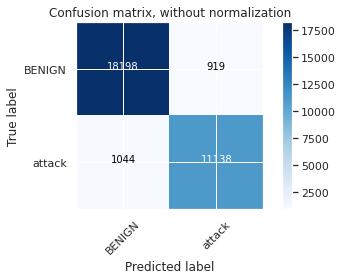

In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['BENIGN','attack'],
                      title='Confusion matrix, without normalization')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  18198
False Positives:  919
False Negatives:  1044
True Positives:  11138


In [ ]:
Precision = tp/(tp+fp)
print("Precision {:0.3f}".format(Precision))

Precision 0.924


In [ ]:
Recall = tp/(tp+fn)
print("Recall {:0.3f}".format(Recall))


Recall 0.914


In [ ]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))

F1 Score 0.919
